In [1]:
## import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download data from arm.gov
For this work, i choosed the Amazon site. Because, for the earth climate system, Amazon rainforest has a 
very important role (carbon sinker).
The data was from GoAmazon2014/15 campaign, conducted by ARM mobile facility.
The ARM (Atmospheric Radiation Measurement) is the part of the U.S. Department of Energy (DOE).

<br>
To download this datasets, first you need to create an account.


## I commented the following merging code script. I attached the already merged dataset (save on my computer), which can be used after this code.

In [2]:
# ## Read 2014 data from my local machine
# filepath='/home/chetan/Research/Amazon/ARM_data/armbeatm/ascii-csv/'
# filename='maoarmbeatmM1.c1.20140101.003000.csv'
# df1=pd.read_csv(filepath+filename)

# ## Read 2015 file
# filename2='maoarmbeatmM1.c1.20150101.003000.csv'
# df2=pd.read_csv(filepath+filename2)


# # Concatenate df1, df2
# df = pd.concat([df1,df2], ignore_index=True)

# ## Drop the unnecessary columns 
# df.drop(['base_time', 'time_offset', 'height_10m', 'height_2m','latent_heat_flux_baebbr',
#          'sensible_heat_flux_baebbr', 'lat', 'lon', 'alt'], axis='columns', inplace=True)

# ## update time object  into pandas datetime 
# df['time']=pd.to_datetime(df.time)
# ## convert UTC into local time
# df['local_time']=df['time'].dt.tz_localize('UTC').dt.tz_convert('America/Manaus')
# df['year']=df.local_time.dt.year ## takes year
# df['month']=df.local_time.dt.month  ## takes month
# df['day']=df.local_time.dt.day ## takes year
# df['hour']=df.local_time.dt.hour  ## takes hour, and add to column hour

# ## let's map integer month into string month
# df['month_name'] = df['month'].map({
#     1: 'January',
#     2: 'February',
#     3: 'March',
#     4: 'April',
#     5: 'May',
#     6: 'June',
#     7: 'July',
#     8: 'August',
#     9: 'September',
#     10: 'October',
#     11: 'November',
#     12: 'December'
# })

# ## let's separate into seasons
# # Define the bins for different time periods
# bins = [1, 5, 9, 12]  # wet season, Dry season, Dry-to-wet:transition

# # Create labels for the time periods
# labels = ['wet', 'dry', 'transition']

# # Use pd.cut to categorize the hours into time periods
# df['season'] = pd.cut(df['month'], bins=bins, right=True, 
#                            labels=labels, include_lowest=True,ordered=False)

# ## rearrange the order of columns
# df=df[['time','local_time', 'year','month','day','hour', 'month_name','season',
#  'u_wind_sfc', 'v_wind_sfc', 'relative_humidity_sfc',
#        'pressure_sfc', 'precip_rate_sfc', 'temperature_sfc',
#        'sensible_heat_flux_qcecor', 'latent_heat_flux_qcecor' ]]

# ## Save the merged data
# #df.to_csv('/home/chetan/Desktop/UMBC/Data_601/project1/maoarmbeatmM1.c1.2014_2015.csv', index=False)


# ## Display the dataframe
# df

# For 2014/15 - whole 2 years analysis

In [3]:
## read the data from local machine
path='/home/chetan/Desktop/UMBC/Data_601/project1/'
filename='maoarmbeatmM1.c1.2014_2015.csv'
df=pd.read_csv(path+filename)

In [4]:
## let's add calculated wind speed
df['wind_speed']=np.sqrt((df['u_wind_sfc'])**2+(df['v_wind_sfc'])**2)  ## unit= m/s

In [5]:
df.head()

,time,local_time,year,month,day,hour,month_name,season,u_wind_sfc,v_wind_sfc,relative_humidity_sfc,pressure_sfc,precip_rate_sfc,temperature_sfc,sensible_heat_flux_qcecor,latent_heat_flux_qcecor,wind_speed
0,2014-01-01 00:30:00,2013-12-31 20:30:00-04:00,2013,12,31,20,December,transition,-1.070984,0.580337,91.289970,1003.36664,0.028291,299.68698,NaN,NaN,1.218112
1,2014-01-01 01:30:00,2013-12-31 21:30:00-04:00,2013,12,31,21,December,transition,-0.075736,0.055618,93.780310,1004.09717,0.059211,299.12262,NaN,NaN,0.093964
2,2014-01-01 02:30:00,2013-12-31 22:30:00-04:00,2013,12,31,22,December,transition,-0.089113,-0.076806,97.027880,1003.93410,0.090130,298.24840,NaN,NaN,0.117645
3,2014-01-01 03:30:00,2013-12-31 23:30:00-04:00,2013,12,31,23,December,transition,-0.761594,-0.456235,98.137710,1003.50104,0.087992,297.55963,NaN,NaN,0.887793
4,2014-01-01 04:30:00,2014-01-01 00:30:00-04:00,2014,1,1,0,January,wet,-0.370673,-0.292567,98.429504,1003.06030,0.052795,296.91100,NaN,NaN,0.472223


In [6]:
df

,time,local_time,year,month,day,hour,month_name,season,u_wind_sfc,v_wind_sfc,relative_humidity_sfc,pressure_sfc,precip_rate_sfc,temperature_sfc,sensible_heat_flux_qcecor,latent_heat_flux_qcecor,wind_speed
0,2014-01-01 00:30:00,2013-12-31 20:30:00-04:00,2013,12,31,20,December,transition,-1.070984,0.580337,91.289970,1003.36664,0.028291,299.68698,NaN,NaN,1.218112
1,2014-01-01 01:30:00,2013-12-31 21:30:00-04:00,2013,12,31,21,December,transition,-0.075736,0.055618,93.780310,1004.09717,0.059211,299.12262,NaN,NaN,0.093964
2,2014-01-01 02:30:00,2013-12-31 22:30:00-04:00,2013,12,31,22,December,transition,-0.089113,-0.076806,97.027880,1003.93410,0.090130,298.24840,NaN,NaN,0.117645
3,2014-01-01 03:30:00,2013-12-31 23:30:00-04:00,2013,12,31,23,December,transition,-0.761594,-0.456235,98.137710,1003.50104,0.087992,297.55963,NaN,NaN,0.887793
4,2014-01-01 04:30:00,2014-01-01 00:30:00-04:00,2014,1,1,0,January,wet,-0.370673,-0.292567,98.429504,1003.06030,0.052795,296.91100,NaN,NaN,0.472223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2015-12-31 19:30:00,2015-12-31 15:30:00-04:00,2015,12,31,15,December,transition,NaN,NaN,NaN,NaN,0.351911,NaN,NaN,NaN,NaN
17516,2015-12-31 20:30:00,2015-12-31 16:30:00-04:00,2015,12,31,16,December,transition,NaN,NaN,NaN,NaN,0.117304,NaN,NaN,NaN,NaN
17517,2015-12-31 21:30:00,2015-12-31 17:30:00-04:00,2015,12,31,17,December,transition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17518,2015-12-31 22:30:00,2015-12-31 18:30:00-04:00,2015,12,31,18,December,transition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## General info of datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       17520 non-null  object 
 1   local_time                 17520 non-null  object 
 2   year                       17520 non-null  int64  
 3   month                      17520 non-null  int64  
 4   day                        17520 non-null  int64  
 5   hour                       17520 non-null  int64  
 6   month_name                 17520 non-null  object 
 7   season                     17520 non-null  object 
 8   u_wind_sfc                 16613 non-null  float64
 9   v_wind_sfc                 16614 non-null  float64
 10  relative_humidity_sfc      16744 non-null  float64
 11  pressure_sfc               16563 non-null  float64
 12  precip_rate_sfc            17514 non-null  float64
 13  temperature_sfc            16654 non-null  flo

Although some variables contains the NaN values, i will kept this due to the small size of data. <br>
(Furthermore, in calculation i will ignore these NaN values)

## Time Series Plot

In [7]:
## import the additional modules
import matplotlib.dates as mdates
from datetime import datetime

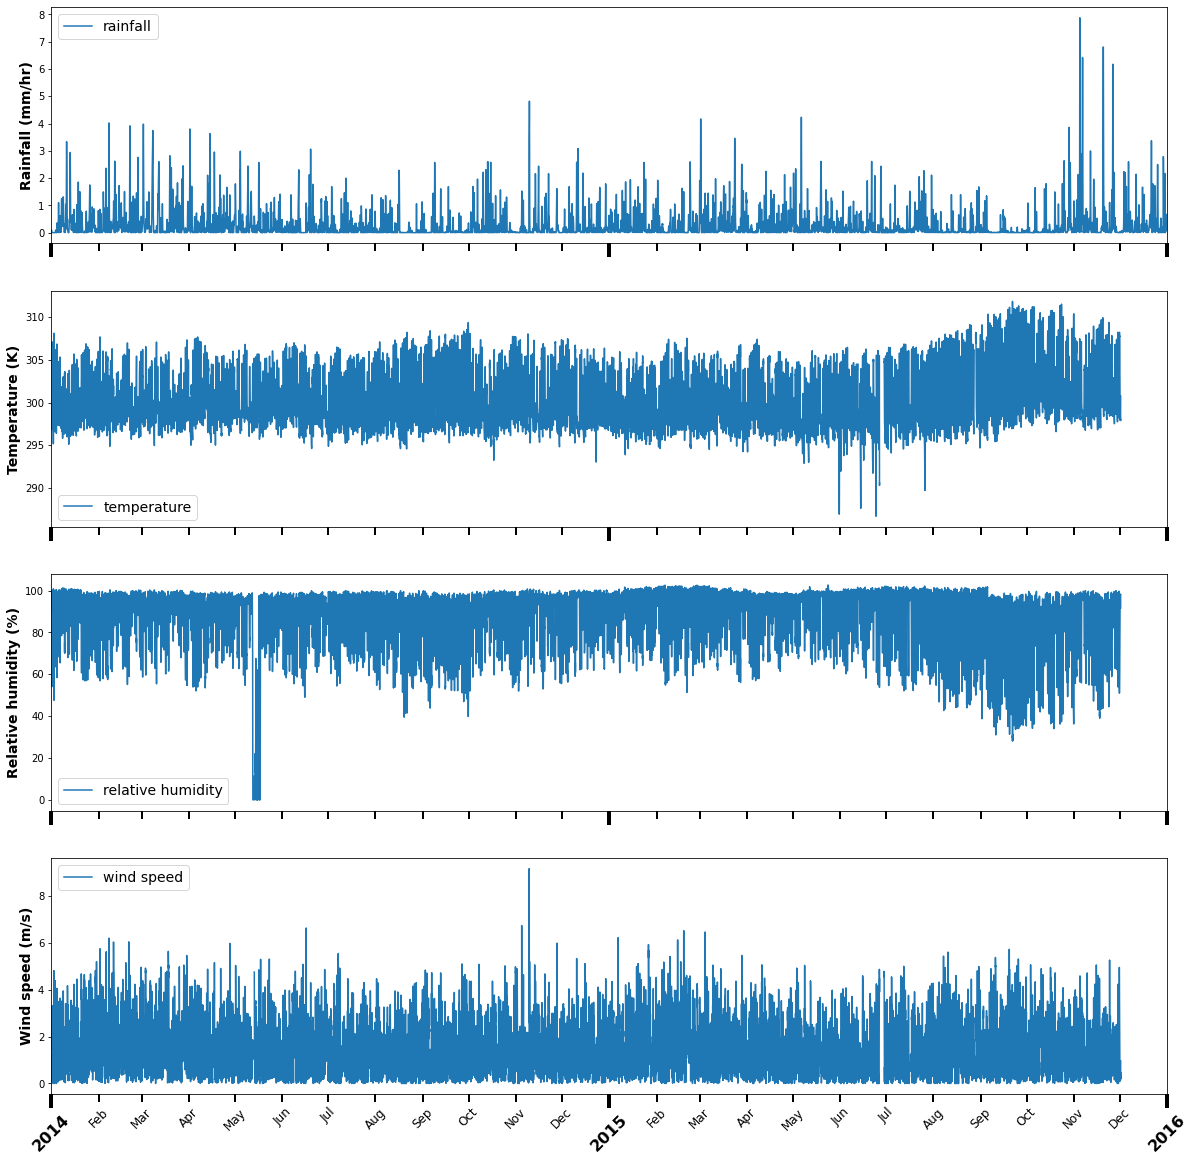

In [8]:
time=pd.to_datetime(df.time)

## create the plots
fig, axes = plt.subplots(4, 1, figsize=(20, 20), sharex=True)
ax1, ax2, ax3, ax4 = axes.ravel()  # Unpack the axes from the array
# Set the major x-axis locator for years and the minor locator for months
years = mdates.YearLocator()  # Major locator for years
months = mdates.MonthLocator()  # Minor locator for months
months_fmt = mdates.DateFormatter('%b')  # Format minor ticks
years_fmt = mdates.DateFormatter('%Y')  # Format major ticks as years
# Limit the x-axis to the desired date range (from Jan 2014 to Dec 2015)
start_date = datetime(2014, 1, 1)
end_date = datetime(2016, 1, 1)

## Precipitation
ax1.plot(time, df['precip_rate_sfc'], label='rainfall')
ax1.set_ylabel('Rainfall (mm/hr)', fontsize=14, fontweight='bold')
## make the major and minor ticks more clear
ax1.tick_params(axis='x', which='major', width=4, length=14, color='k',)# labelsize=12, labelrotation=45)
ax1.tick_params(axis='x', which='minor', width=2, length=8, color='k', )#labelsize=12, labelrotation=45)
## limit the xaxis range
ax1.set_xlim(start_date, end_date)
## locate the legend
ax1.legend(loc='upper left',fontsize=14)

##  Temperature
ax2.plot(time, df['temperature_sfc'], label='temperature')
ax2.set_ylabel('Temperature (K)', fontsize=14, fontweight='bold')
ax2.set_xlim(start_date, end_date)
ax2.legend(loc='lower left',fontsize=14)
ax2.tick_params(axis='x', which='major', width=4, length=14, color='k',)# labelsize=12, labelrotation=45)
ax2.tick_params(axis='x', which='minor', width=2, length=8, color='k', )#labelsize=12, labelrotation=45)


##  Relative Humidity
ax3.plot(time, df['relative_humidity_sfc'], label='relative humidity', )
ax3.set_ylabel('Relative humidity (%)', fontsize=14, fontweight='bold')
ax3.set_xlim(start_date, end_date)
ax3.legend(loc='lower left',fontsize=14)
## make the major and minor ticks more clear
# Rotate the minor tick labels by 45 degrees
ax3.tick_params(axis='x', which='major', width=4, length=14, color='k',)# labelsize=12, labelrotation=45)
ax3.tick_params(axis='x', which='minor', width=2, length=8, color='k', )#labelsize=12, labelrotation=45)


## Wind Speed
ax4.plot(time, df['wind_speed'], label='wind speed')
ax4.set_ylabel('Wind speed (m/s)', fontsize=14, fontweight='bold')
ax4.set_xlim(start_date, end_date)
ax4.legend(loc='upper left', fontsize=14)
ax4.xaxis.set_major_locator(years)
ax4.xaxis.set_major_formatter(years_fmt)
ax4.xaxis.set_minor_locator(months)
ax4.xaxis.set_minor_formatter(months_fmt)
## make the major and minor ticks more clear
# Rotate the minor tick labels by 45 degrees
ax4.tick_params(axis='x', which='major', width=4, length=14, color='k',)# labelsize=12, labelrotation=45)
ax4.tick_params(axis='x', which='minor', width=2, length=8, color='k', labelsize=12, labelrotation=45)

## set xticklabels fontsize and rotation
plt.xticks(fontsize=16, fontweight='bold',rotation=45)
#plt.yticks(fontsize=12, fontweight='bold')

## save the plot
#plt.savefig('Time_Series_full.png', dpi=300, bbox_inches='tight', facecolor='white')

# Show the plot
plt.show()

## Diurnal Cycle

In [9]:
### Hourly precipitation
### group the dataframe based on hour of day, for different variables and aggregrate by mean
df_precip=(df
     .groupby('hour')['precip_rate_sfc']
     .agg(value='mean'))

### hourly T2
df_temp=(df
        .groupby('hour')['temperature_sfc']
        .agg(value='mean'))

### hourly rh
df_rh=(df
        .groupby('hour')['relative_humidity_sfc']
        .agg(value='mean'))

### hourly rh
df_pres=(df
        .groupby('hour')['pressure_sfc']
        .agg(value='mean'))

### hourly wspd
df_wspd=(df
        .groupby('hour')['wind_speed']
        .agg(value='mean'))

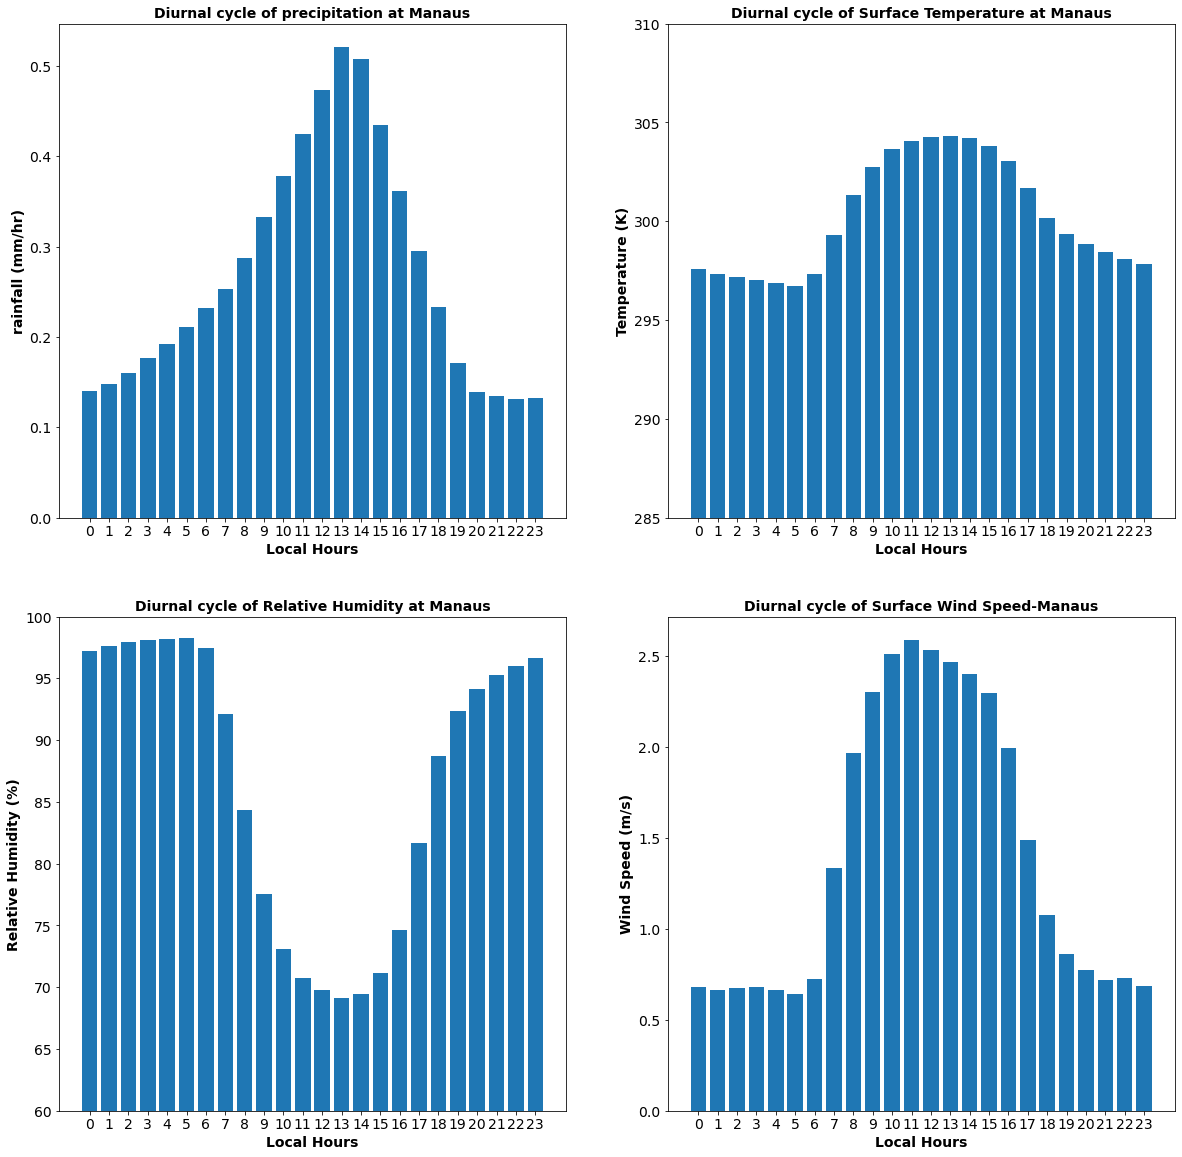

In [10]:
## create the plots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
ax1, ax2, ax3, ax4 = axes.ravel()  # Unpack the axes from the array

## for precipitation
ax1.bar(df_precip.index, df_precip.value)
ax1.set_xlabel('Local Hours', fontsize=14, fontweight='bold')
ax1.set_ylabel('rainfall (mm/hr)', fontsize=14, fontweight='bold')
ax1.set_title('Diurnal cycle of precipitation at Manaus', fontsize=14, fontweight='bold')
ax1.set_xticks(np.arange(len(df_precip.index)), df_precip.index)
ax1.tick_params(axis='both', labelsize=14, )

## for T2
ax2.bar(df_temp.index, df_temp.value)
ax2.set_xlabel('Local Hours', fontsize=14, fontweight='bold')
ax2.set_ylabel('Temperature (K)', fontsize=14, fontweight='bold')
ax2.set_title('Diurnal cycle of Surface Temperature at Manaus', fontsize=14, fontweight='bold')
ax2.set_xticks(np.arange(len(df_temp.index)), df_temp.index)
ax2.tick_params(axis='both', labelsize=14, )
ax2.set_ylim([285, 310])

## for RH2
ax3.bar(df_rh.index, df_rh.value)
ax3.set_xlabel('Local Hours', fontsize=14, fontweight='bold')
ax3.set_ylabel('Relative Humidity (%)', fontsize=14, fontweight='bold')
ax3.set_title('Diurnal cycle of Relative Humidity at Manaus', fontsize=14, fontweight='bold')
ax3.set_xticks(np.arange(len(df_rh.index)), df_rh.index)
ax3.tick_params(axis='both', labelsize=14, )
ax3.set_ylim([60, 100])

## for surface pressure
ax4.bar(df_wspd.index, df_wspd.value)
ax4.set_xlabel('Local Hours', fontsize=14, fontweight='bold')
ax4.set_ylabel('Wind Speed (m/s)', fontsize=14, fontweight='bold')
ax4.set_title('Diurnal cycle of Surface Wind Speed-Manaus', fontsize=14, fontweight='bold')
ax4.set_xticks(np.arange(len(df_pres.index)), df_pres.index)
ax4.tick_params(axis='both', labelsize=14, )
#ax4.set_ylim([995, 1010])
# plt.savefig('DiurnalCycle_full.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Seasonal plot

In [11]:
## Let's plot seasonal precipitation
### group the dataframe based on season of year, for different variables and aggregrate by mean
df_wet=(df[df['season']=='wet']
       .groupby('hour')['precip_rate_sfc']
       .agg(value='mean'))

## Dry season
df_dry=(df[df['season']=='dry']
       .groupby('hour')['precip_rate_sfc']
       .agg(value='mean'))

## Transition
df_transition=(df[df['season']=='transition']
       .groupby('hour')['precip_rate_sfc']
       .agg(value='mean'))

### Wet: January- May
### Dry: June-Sept
### Transition: October-December

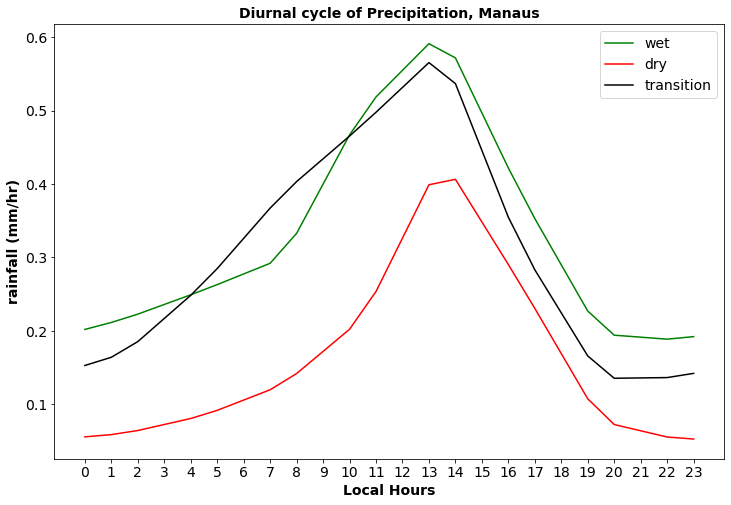

In [12]:
## plot the diurnal cylce of seasonal precipitatin

fig, ax = plt.subplots(figsize=[12,8])
#ax.bar(df_wet.index, df_wet.value)
ax.plot(df_wet.index, df_wet.value, color='g', label='wet')
ax.plot(df_dry.index, df_dry.value, color='r', label='dry')
ax.plot(df_transition.index, df_transition.value, color='k', label='transition')
ax.set_xlabel('Local Hours', fontsize=14, fontweight='bold')
ax.set_ylabel('rainfall (mm/hr)', fontsize=14, fontweight='bold')
ax.set_title('Diurnal cycle of Precipitation, Manaus', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(len(df_wet.index)), df_wet.index)
ax.tick_params(axis='both', labelsize=14, )
#ax.set_ylim([995, 1010])
ax.legend(loc='upper right', fontsize=14)

## save the plot
#plt.savefig('DiurnalCycle_pp_season.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

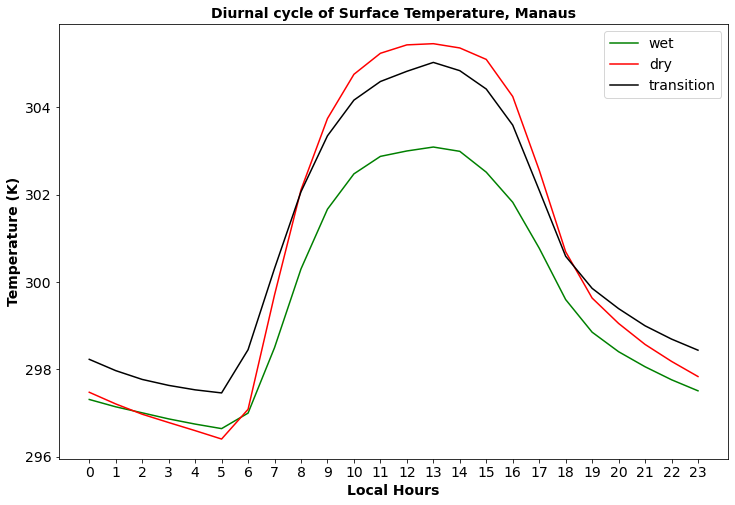

In [13]:
## Let's plot seasonal temperature
df_wet=(df[df['season']=='wet']
       .groupby('hour')['temperature_sfc']
       .agg(value='mean'))

## Dry season
df_dry=(df[df['season']=='dry']
       .groupby('hour')['temperature_sfc']
       .agg(value='mean'))

## Transition
df_transition=(df[df['season']=='transition']
       .groupby('hour')['temperature_sfc']
       .agg(value='mean'))

## plot the diurnal cylce of seasonal precipitatin
fig, ax = plt.subplots(figsize=[12,8])
#ax.bar(df_wet.index, df_wet.value)
ax.plot(df_wet.index, df_wet.value, color='g', label='wet')
ax.plot(df_dry.index, df_dry.value, color='r', label='dry')
ax.plot(df_transition.index, df_transition.value, color='k', label='transition')
ax.set_xlabel('Local Hours', fontsize=14, fontweight='bold')
ax.set_ylabel('Temperature (K)', fontsize=14, fontweight='bold')
ax.set_title('Diurnal cycle of Surface Temperature, Manaus', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(len(df_wet.index)), df_wet.index)
ax.tick_params(axis='both', labelsize=14, )
#ax.set_ylim([995, 1010])
ax.legend(loc='upper right', fontsize=14)
# plt.savefig('DiurnalCycle_Temp_season.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Monthly plot for 2014/15

In [14]:
## check the months
df.month_name.unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [15]:
## List of month
month_name_list=[ 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November','December']

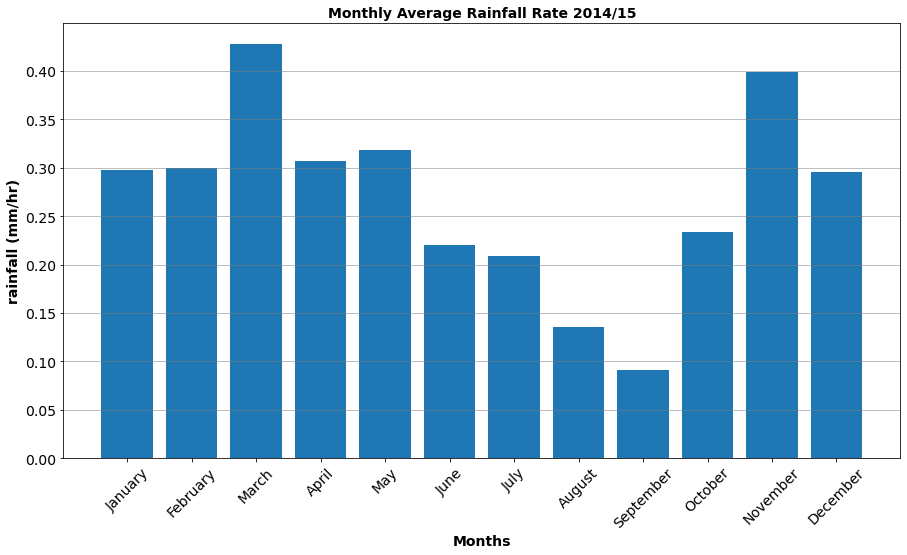

In [16]:
## let's plot by month precipitation
## groupby based on month, aggregrate as mean
df_month=(df
       .groupby('month')['precip_rate_sfc']
       .agg(value='mean'))

## plot the monthly result
fig, ax = plt.subplots(figsize=[15,8])
ax.bar(df_month.index, df_month.value, color='tab:blue')
ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_ylabel('rainfall (mm/hr)', fontsize=14, fontweight='bold')
## title of the plot
ax.set_title('Monthly Average Rainfall Rate 2014/15', fontsize=14, fontweight='bold')
## set xtickslabel and position
ax.set_xticks(np.arange(1,len(df_month.index)+1), month_name_list)
# ax.set_xticks(np.arange(1,13))
# ax.set_xticklabels(month_name_list)
## set tick properties
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='both', labelsize=14, )
ax.grid(which='major', axis='y', color='grey', ls='-', lw=0.5)
#ax.set_ylim([995, 1010])
#plt.savefig('Monthly_avg_pp_full.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

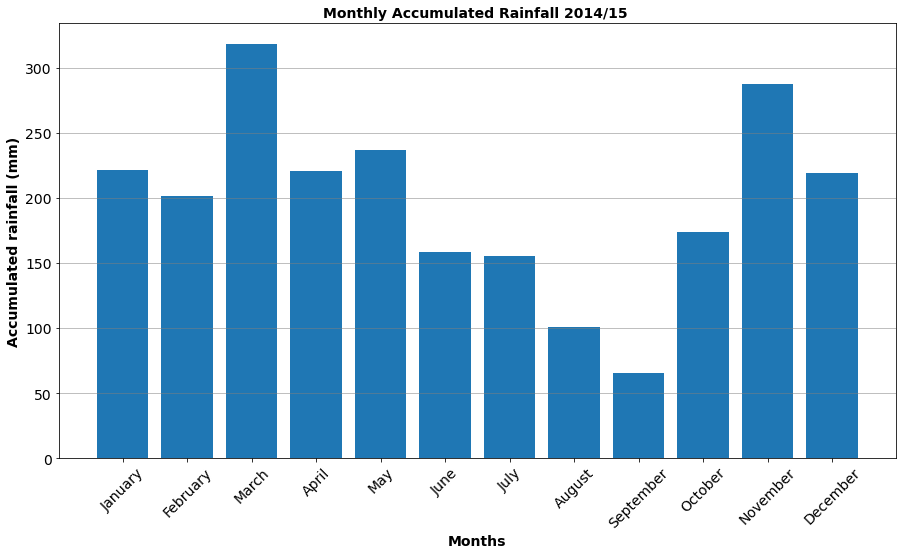

In [17]:
## monthly accumulated rainfall
## group base on month and aggregrate by 'sum'
df_month_acc=(df
       .groupby('month')['precip_rate_sfc']
       .agg(value='sum'))
## plot the monthly result
fig, ax = plt.subplots(figsize=[15,8])
ax.bar(df_month_acc.index, df_month_acc.value/2, color='tab:blue')
ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_ylabel('Accumulated rainfall (mm)', fontsize=14, fontweight='bold')
ax.set_title('Monthly Accumulated Rainfall 2014/15 ', fontsize=14, fontweight='bold')
## set xtics position and label
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(month_name_list)
ax.tick_params(axis='x', rotation=45)
#ax.set_xticks(np.arange(len(df_month.index)), df_month.index)
ax.tick_params(axis='both', labelsize=14, )
ax.grid(which='major', axis='y', color='grey', ls='-', lw=0.5)
#ax.set_ylim([995, 1010])
#plt.savefig('Monthly_acc_pp_full.png', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

### Box plot for monthly precipitation

In [18]:
## Let's extract the precipitatin data for each month
data_boxplot=[df[df['month_name']==name]['precip_rate_sfc'] for name in month_name_list]

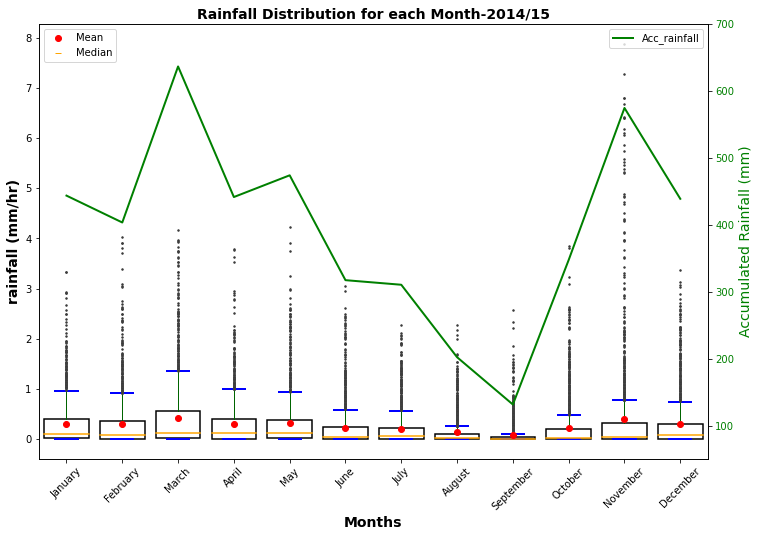

In [19]:
month_name_list=[ 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November','December']
fig, ax=plt.subplots(figsize=[12,8])
## used seaborn here, because seaborn automatically ignore NaN while calculation
sns.boxplot(data=data_boxplot,
            showmeans=True,
            boxprops=dict(facecolor='white',edgecolor='black'),
            flierprops=dict(marker='o', markerfacecolor='k', markersize=1.5),
            medianprops=dict(color='orange'),
            meanprops=dict(marker='o', markerfacecolor='r', markersize=6, markeredgecolor='r'),
           whiskerprops=dict(color='darkgreen', lw=1),
           capprops=dict(c='b', lw=2),
            )#, whis=(0, 100))

ax.tick_params(axis='x', rotation=45)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(month_name_list)
ax.set_ylabel('rainfall (mm/hr)', fontsize=14, fontweight='bold')
ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_title('Rainfall Distribution for each Month-2014/15', fontsize=14, fontweight='bold')
#ax.set_ylim([0,9])

# Create a legend for the mean marker
ax.plot([], marker='o', markersize=6, markerfacecolor='r', markeredgecolor='r', label='Mean', linestyle='None')
ax.plot([], marker='_', markersize=6, markerfacecolor='orange', markeredgecolor='orange', label='Median', linestyle='None')
ax.legend(loc='upper left')

## second variables (accumulated rainfall), that share the same x-axis
ax2=ax.twinx()
ax2.plot(df_month_acc.index-1, df_month_acc.value, color='green', lw=2, label='Acc_rainfall')
ax2.set_ylabel('Accumulated Rainfall (mm)', color='green', fontsize=14)
ax2.set_ylim([50, 700])
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')
#plt.savefig('Monthly_box_full.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

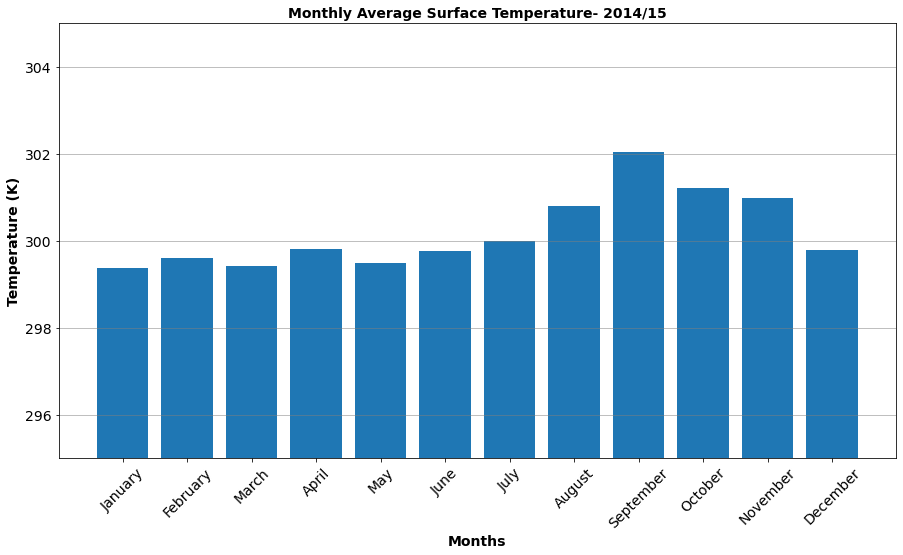

In [20]:
### Monthly temperature
df_month_temp=(df
       .groupby('month')['temperature_sfc']
       .agg(value='mean'))

## plot the monthly result
fig, ax = plt.subplots(figsize=[15,8])
ax.bar(df_month_temp.index, df_month_temp.value, color='tab:blue')
ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_ylabel('Temperature (K)', fontsize=14, fontweight='bold')
ax.set_title('Monthly Average Surface Temperature- 2014/15', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(month_name_list)
ax.tick_params(axis='x', rotation=45)
#ax.set_xticks(np.arange(len(df_month.index)), df_month.index)
ax.tick_params(axis='both', labelsize=14, )
ax.set_ylim([295, 305])
ax.grid(which='major', axis='y', color='grey', ls='-', lw=0.5)
#plt.savefig('Monthly_avg_temp_full.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

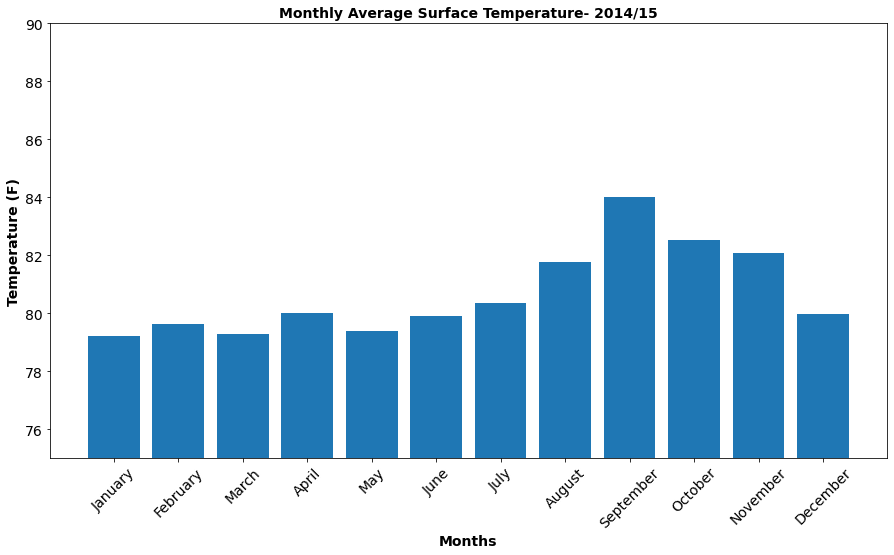

In [21]:
### Monthly temperature in Fahrenhite
df_month_temp=(df
       .groupby('month')['temperature_sfc']
       .agg(value='mean'))

## plot the monthly result
fig, ax = plt.subplots(figsize=[15,8])
ax.bar(df_month_temp.index, ((df_month_temp.value-273.15)*9/5 + 32), color='tab:blue')
ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_ylabel('Temperature (F)', fontsize=14, fontweight='bold')
ax.set_title('Monthly Average Surface Temperature- 2014/15', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(month_name_list)
ax.tick_params(axis='x', rotation=45)
#ax.set_xticks(np.arange(len(df_month.index)), df_month.index)
ax.tick_params(axis='both', labelsize=14, )
ax.set_ylim([75, 90])
#plt.savefig('Monthly_avg_temp(F)_full.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

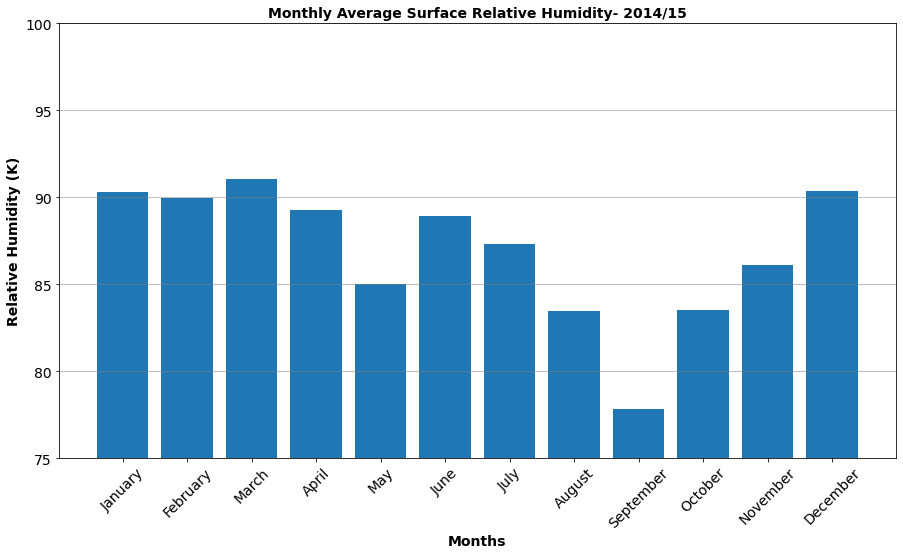

In [22]:
## Monthly Relative Humidity

df_month_rh=(df
       .groupby('month')['relative_humidity_sfc']
       .agg(value='mean'))

## plot the monthly result
fig, ax = plt.subplots(figsize=[15,8])
ax.bar(df_month_rh.index, df_month_rh.value, color='tab:blue')
ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_ylabel('Relative Humidity (K)', fontsize=14, fontweight='bold')
ax.set_title('Monthly Average Surface Relative Humidity- 2014/15', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(month_name_list)
ax.tick_params(axis='x', rotation=45)
#ax.set_xticks(np.arange(len(df_month.index)), df_month.index)
ax.tick_params(axis='both', labelsize=14, )
ax.set_ylim([75, 100])
ax.grid(which='major', axis='y', color='grey', ls='-', lw=0.5)
#plt.savefig('Monthly_avg_rh_full.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

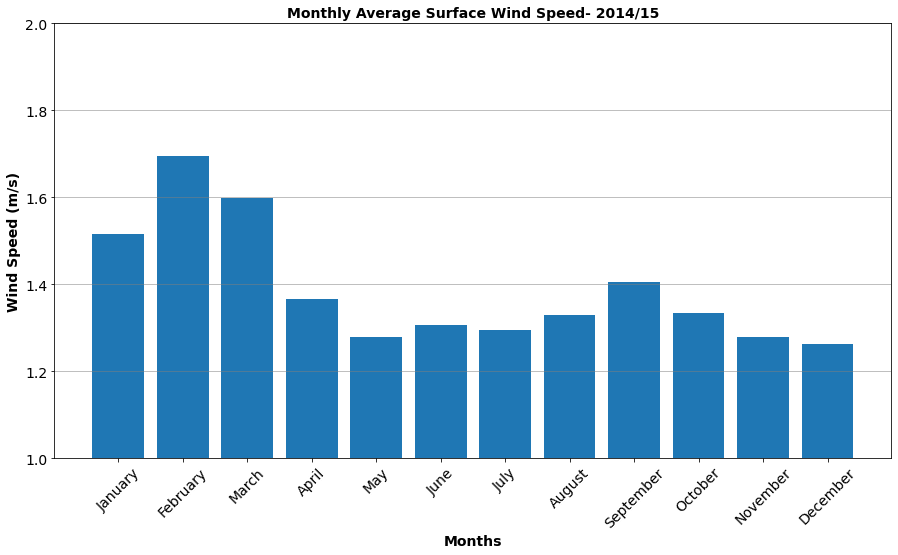

In [23]:
## wind speed

df_month_wspd=(df
       .groupby('month')['wind_speed']
       .agg(value='mean'))

## plot the monthly result
fig, ax = plt.subplots(figsize=[15,8])
ax.bar(df_month_wspd.index, df_month_wspd.value)
ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_ylabel('Wind Speed (m/s)', fontsize=14, fontweight='bold')
ax.set_title('Monthly Average Surface Wind Speed- 2014/15', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(month_name_list)
ax.tick_params(axis='x', rotation=45)
#ax.set_xticks(np.arange(len(df_month.index)), df_month.index)
ax.tick_params(axis='both', labelsize=14, )
ax.set_ylim([1,2])
ax.grid(which='major', axis='y', color='grey', ls='-', lw=0.5)
#plt.savefig('Monthly_avg_wspd_full.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

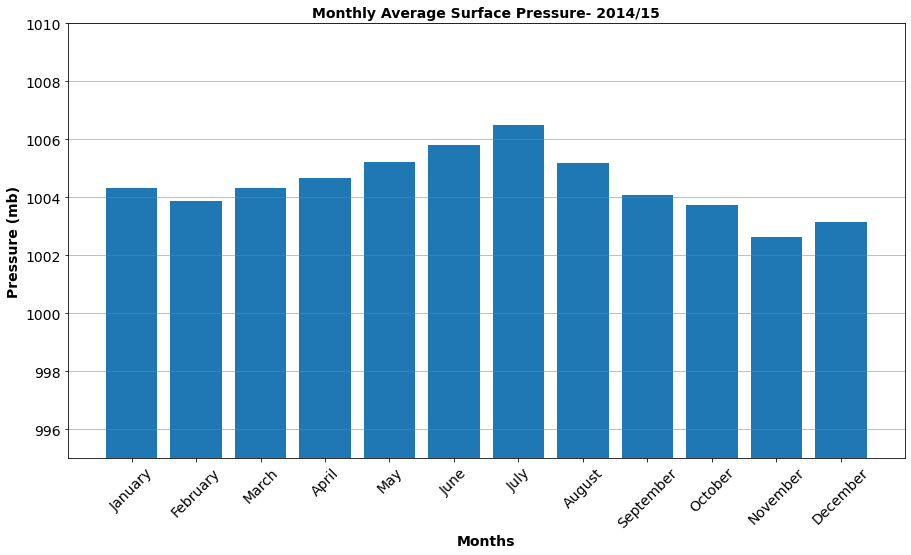

In [24]:
### monthly Surface Pressure
df_pres=(df
        .groupby('month')['pressure_sfc']
        .agg(value='mean'))
## plot the monthly result
fig, ax = plt.subplots(figsize=[15,8])
ax.bar(df_pres.index, df_pres.value)
ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_ylabel('Pressure (mb)', fontsize=14, fontweight='bold')
ax.set_title('Monthly Average Surface Pressure- 2014/15', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(month_name_list)
ax.tick_params(axis='x', rotation=45)
#ax.set_xticks(np.arange(len(df_month.index)), df_month.index)
ax.tick_params(axis='both', labelsize=14, )
ax.set_ylim([995,1010])
ax.grid(which='major', axis='y', color='grey', ls='-', lw=0.5)
#plt.savefig('Monthly_avg_pres_full.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Chance of rain
Number of rain days per month/ number of day for that month

In [25]:
## rain days if precipitation>1mm for one day.
## Rainfall == Precipitation same thing
## First groupby based on  year, month and day, then take precip data, with sum for each day.
## take only if precip > 1mm  (rain days)
## again group the data based on year and month, take a count of days
df_pp_day_per_month = df.groupby(['year', 'month', 'day'])['precip_rate_sfc'].sum().gt(1).groupby(['year', 'month']).sum().unstack()
df_pp_day_per_month

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2014,26.0,28.0,28.0,30.0,28.0,26.0,28.0,18.0,16.0,24.0,17.0,28.0
2015,28.0,22.0,29.0,27.0,30.0,25.0,23.0,18.0,10.0,19.0,26.0,29.0


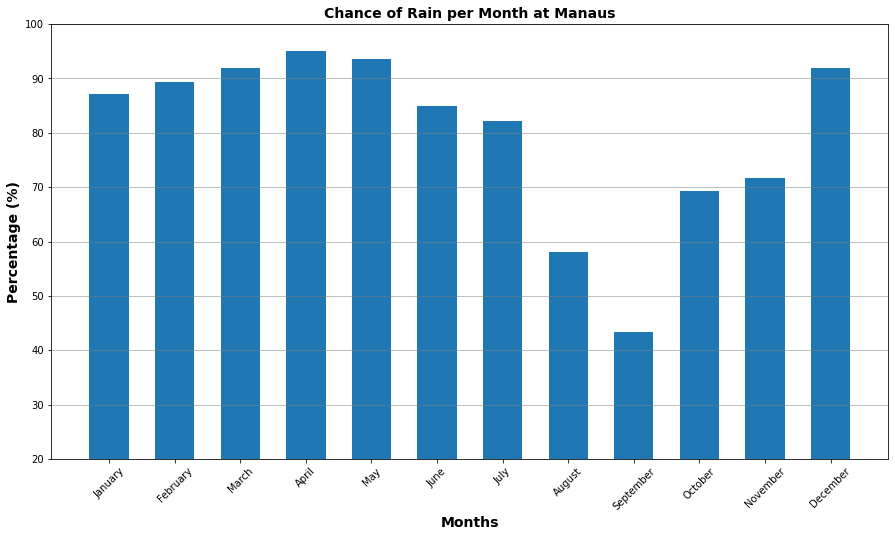

In [26]:
## count the number of days per month
days_in_month=df.groupby('month')['day'].nunique()

x_axis=np.arange(len(month_name_list))

## plot the figure
fig, ax = plt.subplots(figsize=[15,8])
ax.bar(df_pp_day_per_month.columns, 100*(df_pp_day_per_month.loc[2014]+df_pp_day_per_month.loc[2015])/(2*days_in_month),
       width=0.6, align='center',color='tab:blue')
ax.set_xticks(df_pp_day_per_month.columns, month_name_list)
ax.tick_params(axis='x', rotation=45)

ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=14, fontweight='bold')
ax.set_title('Chance of Rain per Month at Manaus', fontsize=14, fontweight='bold')
ax.grid(which='major', axis='y', color='grey', ls='-', lw=0.5)
ax.set_ylim([20, 100]) ## set the limit on yaxis for clear view
#plt.savefig('rain_chance_full.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Monthly precipitation count
Histogram plot of precipitation count

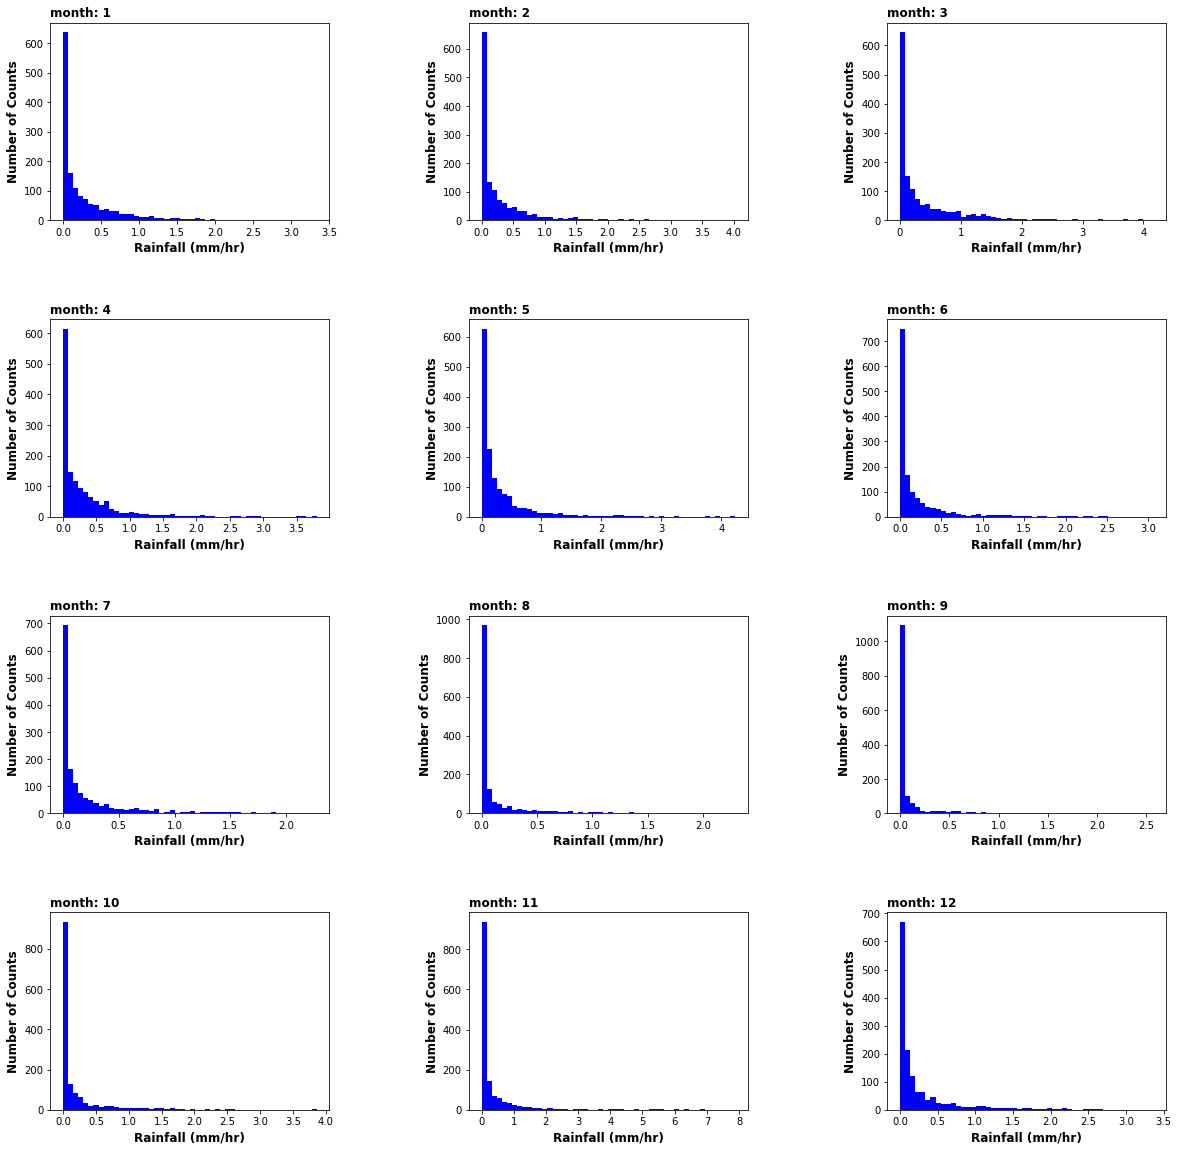

In [27]:
## how frequently the rainfall occur, seasonal, monthly etc.import matplotlib.pyplot as plt
fig , ax =plt.subplots(4,3, figsize=[20,20])
## Title of figure
#fig.suptitle('Hourly Distribution of Library Occupancy', fontsize=16, fontweight='bold')
## adjust the gap in figure
fig.subplots_adjust(wspace=0.5, hspace=0.5)
## flat the rows*cols into 1D
axs=ax.flatten()
## Take index and axis for each subplot
for i , ax in enumerate(axs):
    ## histgram plot of occupancy values for respective hour
    ax.hist(df[df['month']==i+1]['precip_rate_sfc'], bins=50,color='b')
    ax.set_title(f'month: {i+1}', loc='left', fontsize=12, fontweight='bold')
    ax.set_xlabel('Rainfall (mm/hr)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Counts', fontsize=12, fontweight='bold')
#     ## Limit xaxis range
#     ax.set_xlim(0, 50)
#     ## Limit yaxis range
#     ax.set_ylim(0,100)
plt.show()

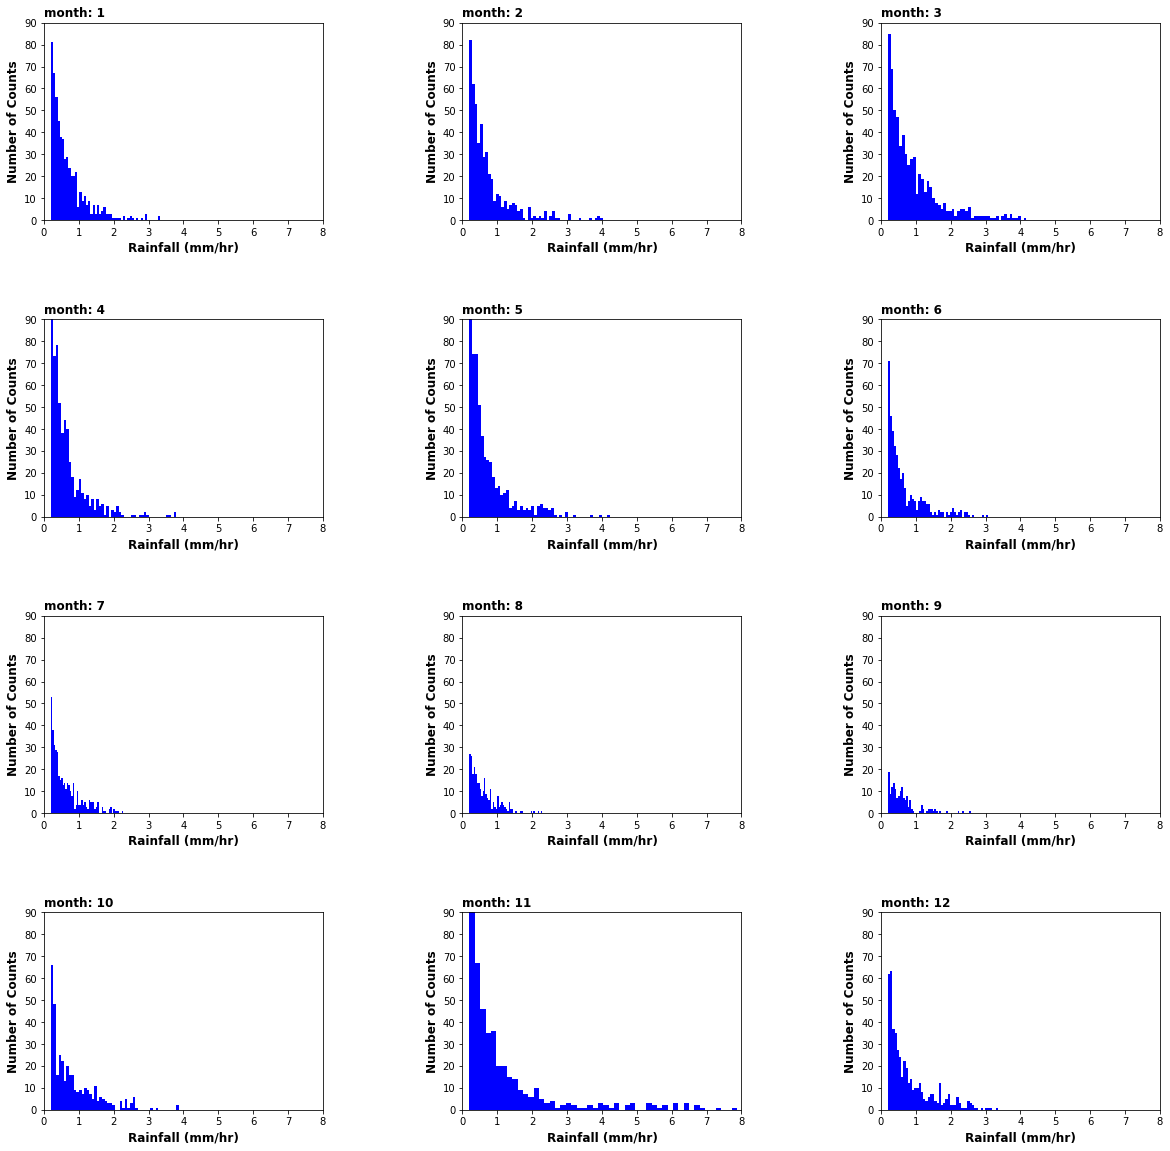

In [28]:
df_threshold=df[df['precip_rate_sfc']>0.2]  ## take only pp rate > 0.2 mm/hr

## how frequently the rainfall occur, seasonal, monthly etc.import matplotlib.pyplot as plt
fig , ax =plt.subplots(4,3, figsize=[20,20])
## Title of figure
#fig.suptitle('Hourly Distribution of Library Occupancy', fontsize=16, fontweight='bold')
## adjust the gap in figure
fig.subplots_adjust(wspace=0.5, hspace=0.5)
## flat the rows*cols into 1D
axs=ax.flatten()
## Take index and axis for each subplot
for i , ax in enumerate(axs):
    ## histgram plot of occupancy values for respective hour
    ax.hist(df_threshold[df_threshold['month']==i+1]['precip_rate_sfc'], bins=50,color='b')
    ax.set_title(f'month: {i+1}', loc='left', fontsize=12, fontweight='bold')
    ax.set_xlabel('Rainfall (mm/hr)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Counts', fontsize=12, fontweight='bold')
    ## Limit xaxis range
    ax.set_xlim(0, 8)
    ## Limit yaxis range
    ax.set_ylim(0,90)
plt.show()


# Compare 2014 vs 2015
Yearwise comparison

### Surface Rainfall (Precipitation), 2014 vs 2015

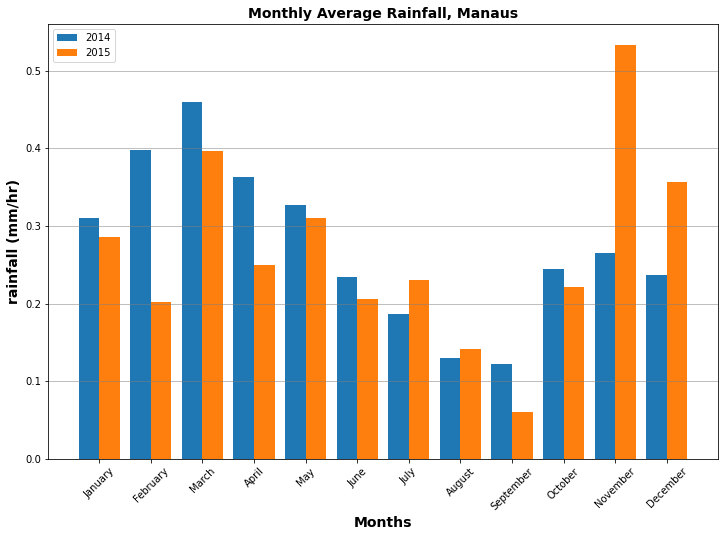

In [29]:
# Group by year and month to calculate the mean precipitation
df_grouped = df.groupby(['year', 'month'])['precip_rate_sfc'].mean().unstack()
df_grouped

## month list
month_name_list=[ 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November','December']
## usefull to adjust bar position
x_axis=np.arange(len(month_name_list))

## Plot the figure
fig, ax = plt.subplots(figsize=[12,8])
ax.bar(x_axis-0.2, df_grouped.loc[2014], width=0.4, align='center',color='tab:blue',label='2014')
ax.bar(x_axis+0.2, df_grouped.loc[2015], width=0.4, align='center',color='tab:orange',label='2015')
ax.set_xticks(x_axis)
ax.set_xticklabels(month_name_list)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper left')
ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_ylabel('rainfall (mm/hr)', fontsize=14, fontweight='bold')
ax.set_title('Monthly Average Rainfall, Manaus', fontsize=14, fontweight='bold')
ax.grid(which='major', axis='y', color='grey', ls='-', lw=0.5)
#plt.savefig('Monthly_avg_pp_yearly.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Accumulated rainfall, 2014 vs 2015

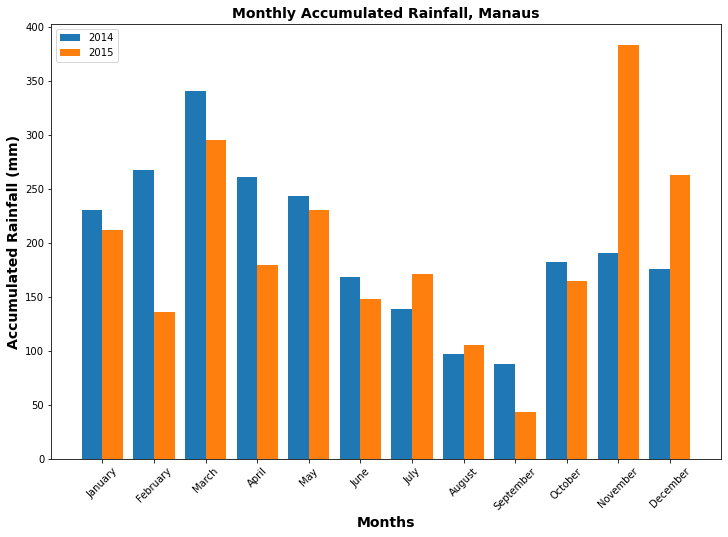

In [30]:
## groupby year and month and take the sum of precipitation for each month then unstack
df_grouped_acc = df.groupby(['year', 'month'])['precip_rate_sfc'].sum().unstack()


x_axis=np.arange(len(month_name_list))

## plot the figure
fig, ax = plt.subplots(figsize=[12,8])
ax.bar(x_axis-0.2, df_grouped_acc.loc[2014], width=0.4, align='center',color='tab:blue',label='2014')
ax.bar(x_axis+0.2, df_grouped_acc.loc[2015], width=0.4, align='center',color='tab:orange',label='2015')
# ax.set_xticks(np.arange(12))
# ax.set_xticklabels(month_name_list)
## set xticks label as name of month
ax.set_xticks(np.arange(len(month_name_list)), month_name_list)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper left')
ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_ylabel('Accumulated Rainfall (mm)', fontsize=14, fontweight='bold')
ax.set_title('Monthly Accumulated Rainfall, Manaus', fontsize=14, fontweight='bold')
#plt.savefig('Monthly_acc_pp_year.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Temperature 2014 vs 2015

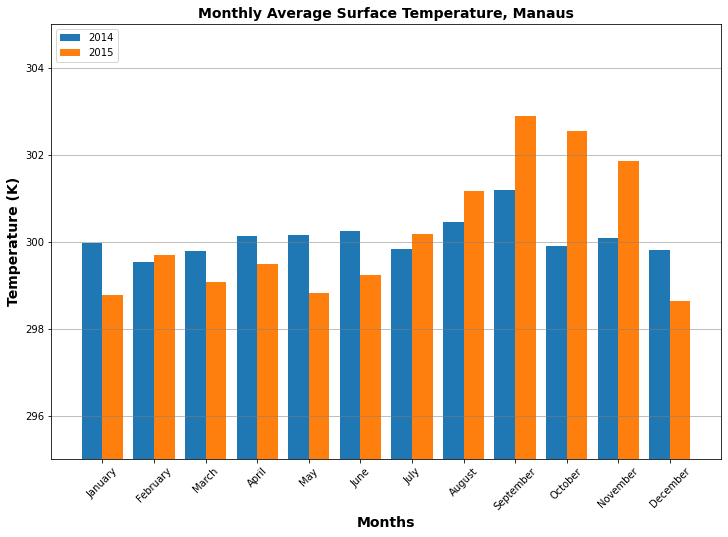

In [31]:
## groupby year and month and take the sum of precipitation for each month then unstack
df_grouped_temp = df.groupby(['year', 'month'])['temperature_sfc'].mean().unstack()
x_axis=np.arange(len(month_name_list))

## plot the figure
fig, ax = plt.subplots(figsize=[12,8])
ax.bar(x_axis-0.2, df_grouped_temp.loc[2014], width=0.4, align='center',color='tab:blue',label='2014')
ax.bar(x_axis+0.2, df_grouped_temp.loc[2015], width=0.4, align='center',color='tab:orange',label='2015')
# ax.set_xticks(np.arange(12))
# ax.set_xticklabels(month_name_list)
ax.set_xticks(np.arange(len(month_name_list)), month_name_list)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper left')
ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_ylabel('Temperature (K)', fontsize=14, fontweight='bold')
ax.set_title('Monthly Average Surface Temperature, Manaus', fontsize=14, fontweight='bold')
ax.grid(which='major', axis='y', color='grey', ls='-', lw=0.5)
ax.set_ylim([295, 305])
#plt.savefig('Monthly_avg_temp_yearly.png', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

### Relative Humidity , 2014 vs 2015

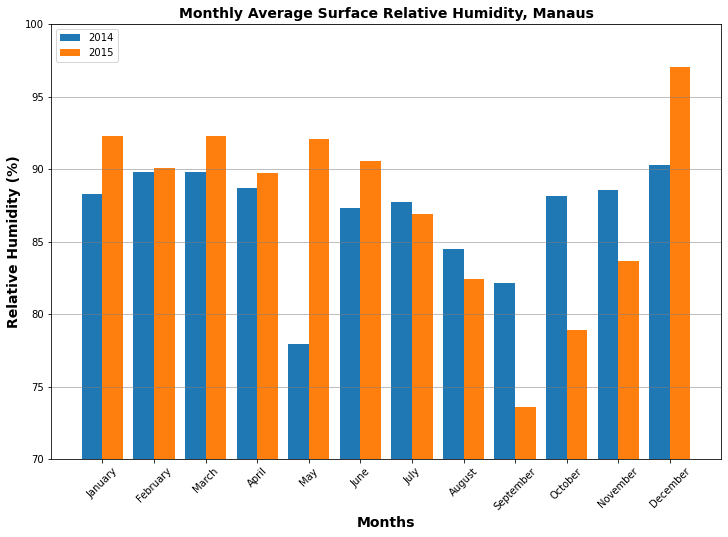

In [32]:
## grouped df
df_grouped_rh = df.groupby(['year', 'month'])['relative_humidity_sfc'].mean().unstack()
x_axis=np.arange(len(month_name_list))

## plot the figure
fig, ax = plt.subplots(figsize=[12,8])
ax.bar(x_axis-0.2, df_grouped_rh.loc[2014], width=0.4, align='center',color='tab:blue',label='2014')
ax.bar(x_axis+0.2, df_grouped_rh.loc[2015], width=0.4, align='center',color='tab:orange',label='2015')
# ax.set_xticks(np.arange(12))
# ax.set_xticklabels(month_name_list)
ax.set_xticks(np.arange(len(month_name_list)), month_name_list)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper left')
ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_ylabel('Relative Humidity (%)', fontsize=14, fontweight='bold')
ax.set_title('Monthly Average Surface Relative Humidity, Manaus', fontsize=14, fontweight='bold')
ax.set_ylim([70, 100]) ## set the limit on yaxis for clear view
ax.grid(which='major', axis='y', color='grey', ls='-', lw=0.5)
#plt.savefig('Monthly_avg_rh_yearly.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Wind Speed, 2014 vs 2015

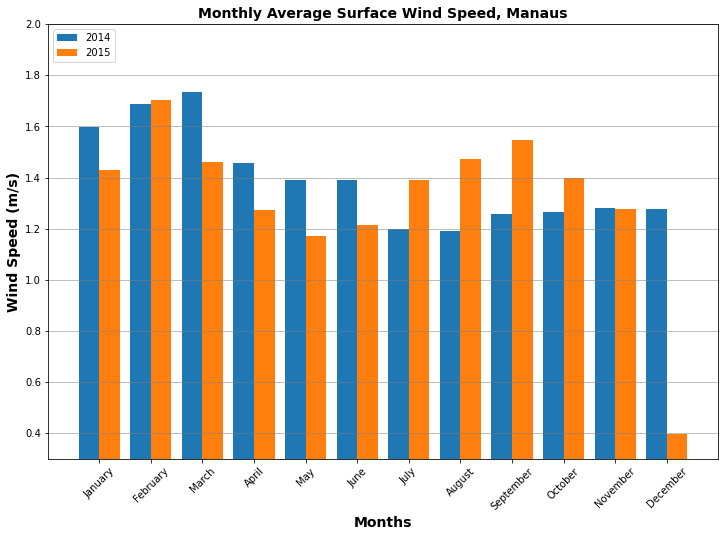

In [33]:
df_grouped_wspd = df.groupby(['year', 'month'])['wind_speed'].mean().unstack()
x_axis=np.arange(len(month_name_list))

## plot the figure
fig, ax = plt.subplots(figsize=[12,8])
ax.bar(x_axis-0.2, df_grouped_wspd.loc[2014], width=0.4, align='center',color='tab:blue',label='2014')
ax.bar(x_axis+0.2, df_grouped_wspd.loc[2015], width=0.4, align='center',color='tab:orange',label='2015')
ax.set_xticks(np.arange(12))
ax.set_xticklabels(month_name_list)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper left')
ax.set_xlabel('Months', fontsize=14, fontweight='bold')
ax.set_ylabel('Wind Speed (m/s)', fontsize=14, fontweight='bold')
ax.set_title('Monthly Average Surface Wind Speed, Manaus', fontsize=14, fontweight='bold')
ax.set_ylim([0.3, 2])
ax.grid(which='major', axis='y', color='grey', ls='-', lw=0.5)
#plt.savefig('Monthly_avg_wspd_yearly.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Diurnal plot, 2014 vs 2015

### Rainfall

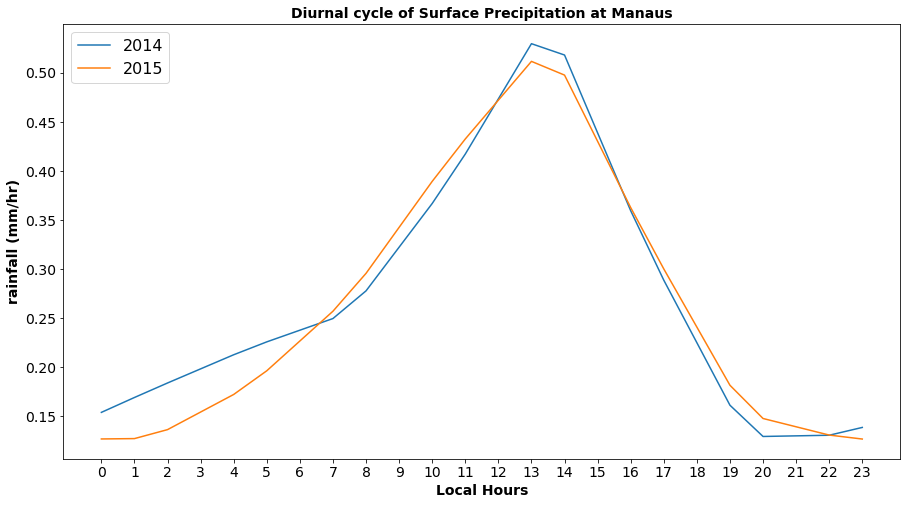

In [34]:
## group by year and hour, take the mean
df_grouped_hour_precip = df.groupby(['year', 'hour'])['precip_rate_sfc'].mean().unstack()

fig, ax = plt.subplots(figsize=[15,8])
#ax.bar(df_wet.index, df_wet.value)
ax.plot(df_grouped_hour_precip.columns, df_grouped_hour_precip.loc[2014], color='tab:blue', label='2014')
ax.plot(df_grouped_hour_precip.columns, df_grouped_hour_precip.loc[2015], color='tab:orange', label='2015')

ax.set_xlabel('Local Hours', fontsize=14, fontweight='bold')
ax.set_ylabel('rainfall (mm/hr)', fontsize=14, fontweight='bold')
ax.set_title('Diurnal cycle of Surface Precipitation at Manaus', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(len(df_grouped_hour_precip.columns)), df_grouped_hour_precip.columns)
ax.tick_params(axis='both', labelsize=14, )
#ax.set_ylim([995, 1010])

ax.legend(loc='upper left', fontsize=16)
#plt.savefig('Diurnal_avg_pp_yearly.png', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

### Temperature, 2014 vs 2015

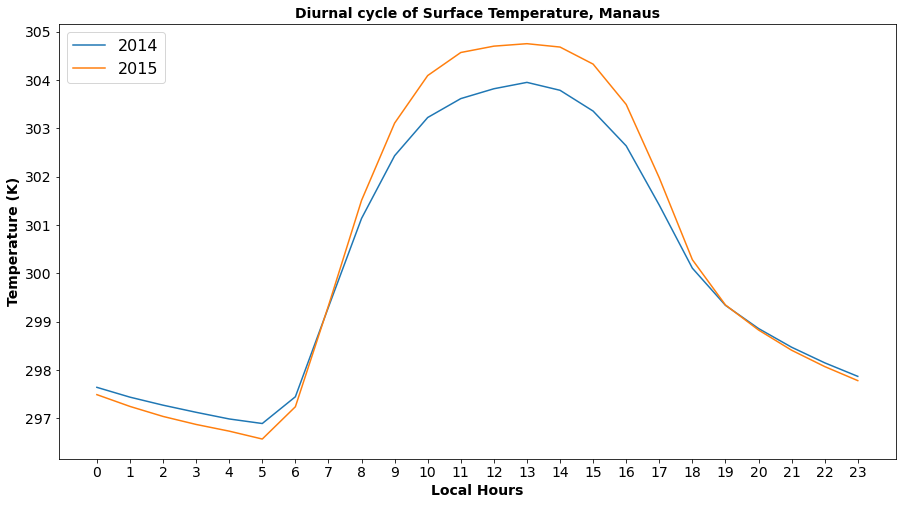

In [35]:
df_grouped_hour_temp = df.groupby(['year', 'hour'])['temperature_sfc'].mean().unstack()

## plot the figure
fig, ax = plt.subplots(figsize=[15,8])
#ax.bar(df_wet.index, df_wet.value)
ax.plot(df_grouped_hour_temp.columns, df_grouped_hour_temp.loc[2014], color='tab:blue', label='2014')
ax.plot(df_grouped_hour_temp.columns, df_grouped_hour_temp.loc[2015], color='tab:orange', label='2015')

ax.set_xlabel('Local Hours', fontsize=14, fontweight='bold')
ax.set_ylabel('Temperature (K)', fontsize=14, fontweight='bold')
ax.set_title('Diurnal cycle of Surface Temperature, Manaus', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(len(df_grouped_hour_temp.columns)), df_grouped_hour_temp.columns)
ax.tick_params(axis='both', labelsize=14, )
#ax.set_ylim([995, 1010])

ax.legend(loc='upper left', fontsize=16)
#plt.savefig('Diurnal_avg_temp_yearly.png', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

### Relative humidity, 2014 vs 2015

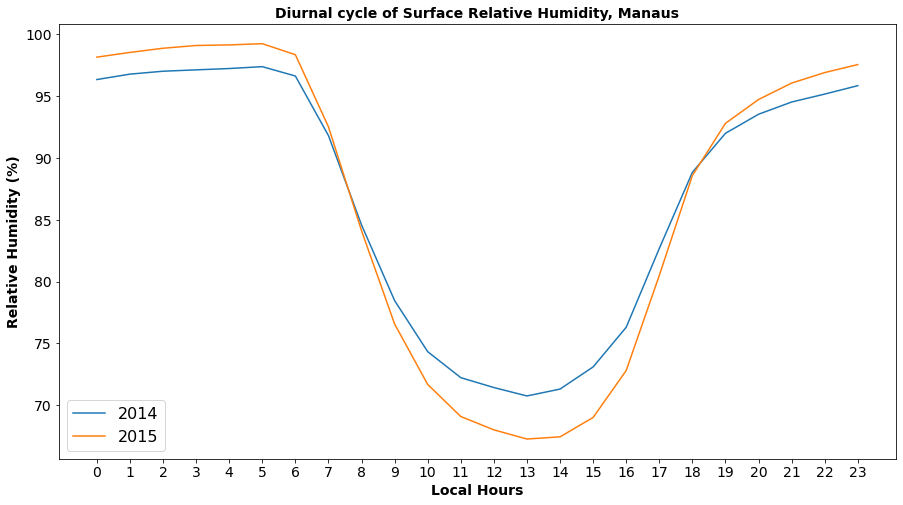

In [36]:
df_grouped_hour_rh = df.groupby(['year', 'hour'])['relative_humidity_sfc'].mean().unstack()

## plot the figure
fig, ax = plt.subplots(figsize=[15,8])
#ax.bar(df_wet.index, df_wet.value)
ax.plot(df_grouped_hour_rh.columns, df_grouped_hour_rh.loc[2014], color='tab:blue', label='2014')
ax.plot(df_grouped_hour_rh.columns, df_grouped_hour_rh.loc[2015], color='tab:orange', label='2015')

ax.set_xlabel('Local Hours', fontsize=14, fontweight='bold')
ax.set_ylabel('Relative Humidity (%)', fontsize=14, fontweight='bold')
ax.set_title('Diurnal cycle of Surface Relative Humidity, Manaus', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(len(df_grouped_hour_rh.columns)), df_grouped_hour_rh.columns)
ax.tick_params(axis='both', labelsize=14, )
#ax.set_ylim([995, 1010])
ax.legend(loc='lower left', fontsize=16)
#plt.savefig('Diurnal_avg_rh_yearly.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Wind Speed, 2014 vs 2015

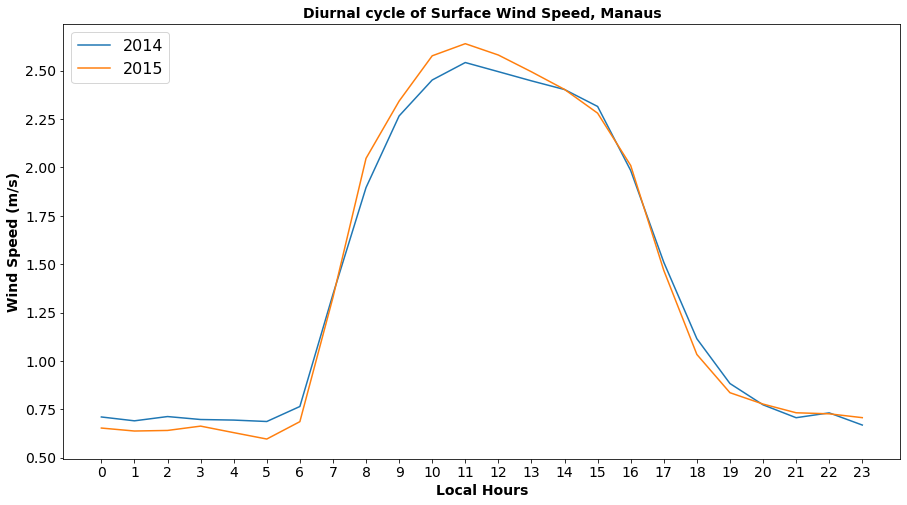

In [37]:
df_grouped_hour_wspd = df.groupby(['year', 'hour'])['wind_speed'].mean().unstack()

## plot the figure
fig, ax = plt.subplots(figsize=[15,8])
#ax.bar(df_wet.index, df_wet.value)
ax.plot(df_grouped_hour_wspd.columns, df_grouped_hour_wspd.loc[2014], color='tab:blue', label='2014')
ax.plot(df_grouped_hour_wspd.columns, df_grouped_hour_wspd.loc[2015], color='tab:orange', label='2015')

ax.set_xlabel('Local Hours', fontsize=14, fontweight='bold')
ax.set_ylabel('Wind Speed (m/s)', fontsize=14, fontweight='bold')
ax.set_title('Diurnal cycle of Surface Wind Speed, Manaus', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(len(df_grouped_hour_wspd.columns)), df_grouped_hour_wspd.columns)
ax.tick_params(axis='both', labelsize=14, )
#ax.set_ylim([995, 1010])

ax.legend(loc='upper left', fontsize=16)
#plt.savefig('Diurnal_avg_wspd_yearly.png', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

# Convectiv cloud , Example

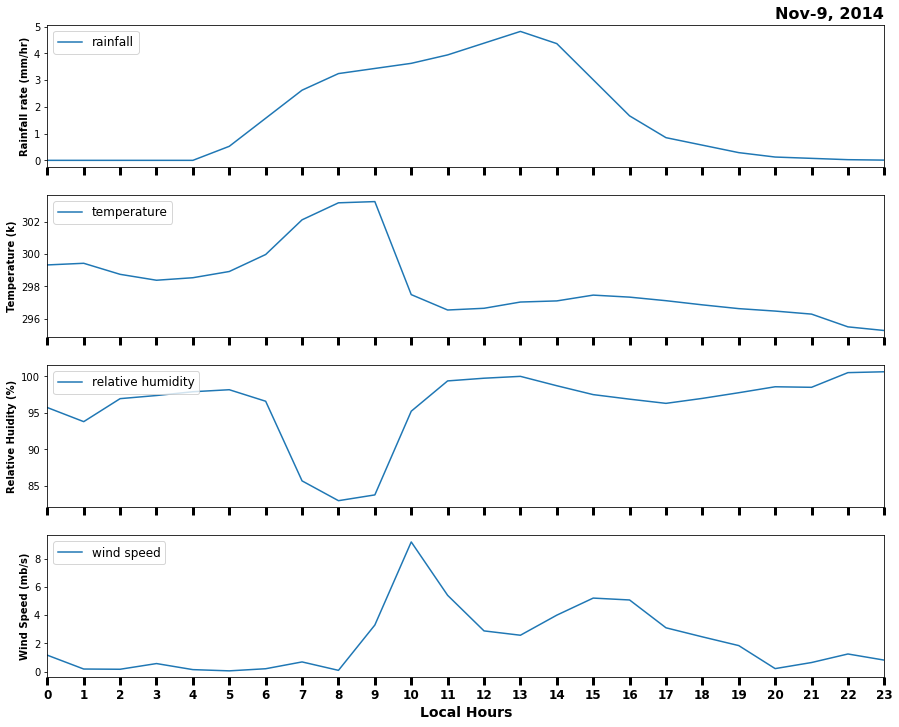

In [38]:
## Lets check high pp rate at 2014 Nov
df_event=df[(df['year']==2014) & (df['month']==11)]
## get the data for day 9
pp_event=df_event[df_event['day']==9]


###
## create the plots
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
ax1, ax2, ax3, ax4 = axes.ravel()  # Unpack the axes from the array

## precipitation
ax1.plot(pp_event['hour'], pp_event['precip_rate_sfc'], label='rainfall')
ax1.set_xticks(np.arange(len(pp_event.hour)), pp_event.hour)
ax1.set_ylabel('Rainfall rate (mm/hr)', fontsize=10, fontweight='bold')
ax1.legend(loc='upper left', fontsize=12)
## 
ax1.set_title('Nov-9, 2014', fontsize=16, fontweight='bold', loc='right')
## change the major xtick size
ax1.tick_params(axis='x', which='major', width=3, length=8, color='k',)

## temperature
ax2.plot(pp_event['hour'], pp_event['temperature_sfc'], label='temperature')
ax2.set_xticks(np.arange(len(pp_event.hour)), pp_event.hour)
ax2.set_ylabel('Temperature (k)', fontsize=10, fontweight='bold')
ax2.legend(loc='upper left', fontsize=12)
ax2.tick_params(axis='x', which='major', width=3, length=8, color='k',)

## Relative humidity
ax3.plot(pp_event['hour'], pp_event['relative_humidity_sfc'], label='relative humidity')
ax3.set_xticks(np.arange(len(pp_event.hour)), pp_event.hour)
ax3.set_ylabel('Relative Huidity (%)', fontsize=10, fontweight='bold')
ax3.legend(loc='upper left', fontsize=12)
## change the major xtick size
ax3.tick_params(axis='x', which='major', width=3, length=8, color='k',)

## surface pressure
ax4.plot(pp_event['hour'], pp_event['wind_speed'], label='wind speed')
ax4.set_xticks(np.arange(len(pp_event.hour)), pp_event.hour)
ax4.set_ylabel('Wind Speed (mb/s)', fontsize=10, fontweight='bold')
ax4.legend(loc='upper left', fontsize=12)
ax4.tick_params(axis='x', which='major', width=3, length=8, color='k',)

## change fontsize and boldness of xticks
plt.xticks(fontsize=12, fontweight='bold')
plt.xlabel('Local Hours', fontsize=14, fontweight='bold')
## limit the xaxis
plt.xlim([0,23])


## save the plot
#plt.savefig('convective_event.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# For Data Source Picture

In [39]:
# import warnings
# warnings.filterwarnings("ignore")

# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# from matplotlib.cm import get_cmap
# import matplotlib.ticker as mticker

# import cartopy
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import cartopy.mpl.geoaxes
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# from cartopy.feature import NaturalEarthFeature
# import cartopy.io.img_tiles as cimgt
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# import matplotlib.patches as patches


# # read image file
# with mpl.cbook.get_sample_data(r"/home/chetan/Desktop/UMBC/Data_601/project1/instrument_T3.jpg") as file:
    
#     arr_image = plt.imread(file, format='jpg')
    
# # Set up the figure and axis
# fig = plt.figure(figsize=(12,12))
# ax = plt.axes(projection=ccrs.PlateCarree())
# #plt.title('Study Area', fontsize=16, fontweight='bold')

# # Set the extent to the Amazon rainforest region
# min_lon, max_lon, min_lat, max_lat = -61, -59, -4, -2
# extent=[min_lon, max_lon, min_lat, max_lat]
# ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# # Add the Google Maps imagery to the plot
# google_tiles = cimgt.GoogleTiles(style='satellite')
# ax.add_image(google_tiles, 10)  # at 11, Kernel Dead


# #ax1.set_extent(extent) # set extents
# ax.set_xticks(np.linspace(extent[0],extent[1],11),crs=ccrs.PlateCarree()) # set longitude indicators
# ax.set_yticks(np.linspace(extent[2],extent[3],11)[1:],crs=ccrs.PlateCarree()) # set latitude indicators
# lon_formatter = LongitudeFormatter(number_format='0.1f',degree_symbol='',dateline_direction_label=True) # format lons
# lat_formatter = LatitudeFormatter(number_format='0.1f',degree_symbol='') # format lats
# ax.xaxis.set_major_formatter(lon_formatter) # set lons
# ax.yaxis.set_major_formatter(lat_formatter) # set lats
# ax.xaxis.set_tick_params(labelsize=14)
# ax.yaxis.set_tick_params(labelsize=14)

# # write text using the text function
# ax.text(-60., -2.8, 'Manaus',color='white', fontsize=18, fontweight='bold', ha='center', va='center')
# ax.text(-60.589, -3.21, 'T3',color='white', fontsize=18, fontweight='bold', ha='center', va='center')


# # Draw image
# axin = ax.inset_axes([-61,-4,0.6,0.6],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# #plt.savefig('/home/chetan/Desktop/UMBC/Data_601/project1/arm_site.png',dpi=300, bbox_inches='tight')
# plt.show()